In [1]:
from delaunay import *
from visualizer.main import Visualizer
from PIL import Image


In [2]:
points = [
    Point(16.858350398732124, 67.52559214446379),
    Point(62.19466439077569, 29.72077304281554),
    Point(79.97232165983654, 57.80428508407838),
    Point(55.48463745823516, 17.671016660925154),
    Point(36.64158181583408, 39.678481870771996),
    Point(77.8684636728082, 23.695280606248136),
    Point(5.800496436158853, 87.44959696844924),
    Point(13.712835757835817, 21.42405744051963),
    Point(84.04590114219371, 59.77928598782353),
    Point(25.551687881586027, 99.80119781712979)
]

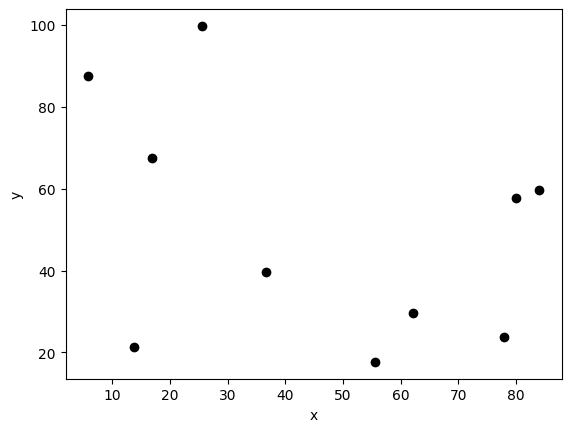

In [3]:
# just the generated points
vis = Visualizer()
vis.add_point([p.get() for p in points], color="black")
vis.show()

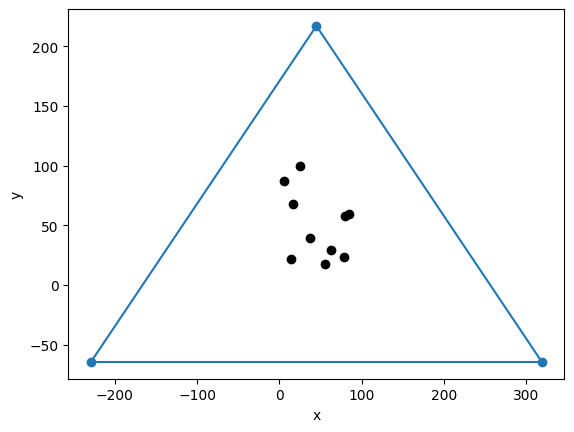

In [4]:
# points with super triangle
delaunay = DelaunayTriangulation(points)
super_triangle = delaunay.inittriangle
super_triangle_vis = vis.add_line_segment([(edge.p1.get(), edge.p2.get()) for edge in super_triangle.edges])
super_triangle_points_vis = vis.add_point([p.get() for p in super_triangle.to_point_list()])
vis.show()

In [5]:
# move frame by frame in gif


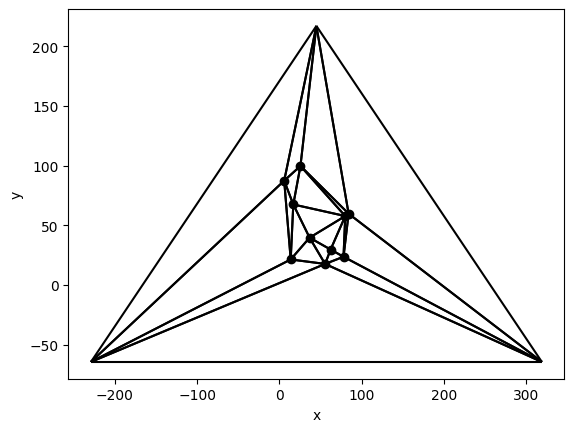

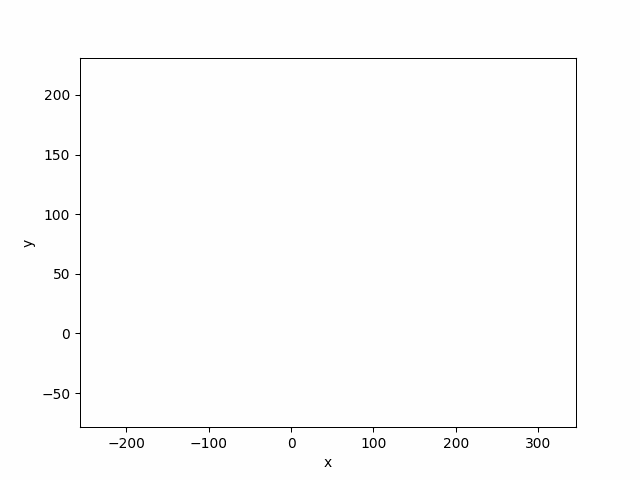

In [6]:
delaunay = DelaunayTriangulation(points)
_, vis = delaunay.run_with_visualisation()
vis.show_gif(interval=300)

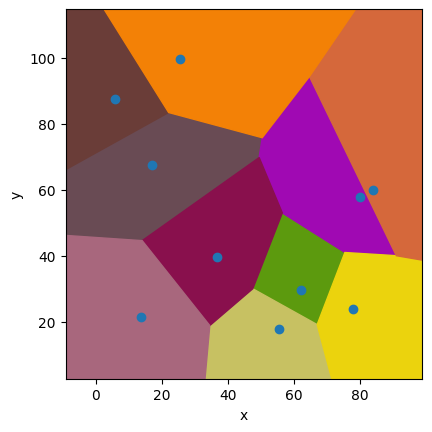

In [17]:
from matplotlib import pyplot as plt
import numpy as np


voronoi_diagram = VoronoiDiagram(points, delaunay.neighbours, delaunay.triangulation)
plygon_list = voronoi_diagram.create_diagram()
vis_diagram = Visualizer()

for polygon in plygon_list:
    vis_diagram.add_polygon(polygon.data, color=np.random.rand(3, ))

# find boundaries for diagram
min_x, max_x, min_y, max_y = voronoi_diagram.create_boundary_for_points()
vis_diagram.add_point([p.get() for p in points])


vis_diagram.show()
plt.xlim(min_x - 15, max_x + 15)
plt.ylim(min_y - 15, max_y + 15)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

